In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
model = ResNet50(include_top=False, pooling='avg')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
new_model = Sequential()
new_model.add(model)


In [4]:
new_model.add(Dense(1, ))

In [5]:
print new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [13]:
DIR = '/Users/dima/Downloads/SCUT-FBP5500_with_Landmarks/'

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(DIR + 'ratings.csv')

In [16]:
from collections import defaultdict
import numpy as np

In [17]:
all_images = defaultdict(list)

In [18]:
for filename, rating in df[['Filename', 'Rating']].values:
    all_images[filename].append(rating)

In [19]:
data = {}
for filename, ratings in all_images.iteritems():
    data[filename] = np.mean(ratings)

In [20]:
len(data)

5500

In [21]:
ratings = dict(data)

In [22]:
import os

In [23]:
from keras.preprocessing import image

In [24]:
images = []
ys = []
for filename in os.listdir(DIR + '/Images'):
    img_path = DIR + '/Images/' + filename
    img=image.load_img(img_path)
    img=image.img_to_array(img)
    images.append(img)
    ys.append(ratings[filename])
    

In [25]:
len(images)

5500

In [26]:
len(ys)

5500

In [27]:
import matplotlib.pyplot as plt

2.9


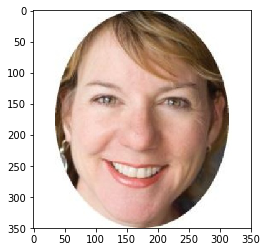

In [28]:
IND = 200
plt.imshow(images[IND]/255.0)
print ys[IND]
plt.show()

In [29]:
import random

In [30]:
all_data = zip(images, ys)

In [31]:
random.shuffle(all_data)

In [32]:
train_size = int(len(all_data)*0.8)
train_data = all_data[:train_size]
test_data = all_data[train_size:]

In [33]:
train_images, train_ys = zip(*train_data)

In [34]:
train_images = list(train_images)
train_ys = list(train_ys)

In [35]:
len(train_images)

4400

1.03333333333


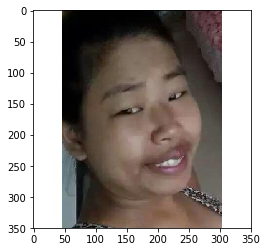

In [36]:
IND = np.argmin(train_ys)
plt.imshow(train_images[IND]/255.0)
print train_ys[IND]
plt.show()

In [37]:
test_images, test_ys = zip(*test_data)
test_images = list(test_images)
test_ys = list(test_ys)

4.6


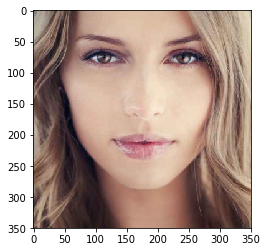

In [38]:
IND = np.argmax(test_ys)
plt.imshow(test_images[IND]/255.0)
print test_ys[IND]
plt.show()

In [39]:
train_X = np.array(train_images)
print train_X.shape

(4400, 350, 350, 3)


In [40]:
train_Y = np.array(train_ys)
print train_Y.shape

(4400,)


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler().fit(train_Y.reshape(-1, 1))

In [43]:
train_Y = scaler.transform(train_Y.reshape(-1, 1))

In [44]:
test_X = np.array(test_images)
print test_X.shape

(1100, 350, 350, 3)


In [45]:
test_Y = np.array(test_ys)
print test_Y.shape

(1100,)


In [46]:
test_Y = scaler.transform(test_Y.reshape(-1, 1))

In [47]:
print train_Y.shape
print test_Y.shape

(4400, 1)
(1100, 1)


In [6]:
new_model.load_weights('/Users/dima/Temp/final_model')

In [48]:
predicted = new_model.predict(test_X)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

In [50]:
print 'RMSE:', np.sqrt(mean_squared_error(test_Y, predicted))
print 'MAE:', mean_absolute_error(test_Y, predicted)
print 'PC:', pearsonr(test_Y, predicted)[0][0]

RMSE: 0.076643123844
MAE: 0.0593505078092
PC: 0.940601410524


In [51]:
test_inversed = scaler.inverse_transform(test_Y)
predicted_inversed = scaler.inverse_transform(predicted)

In [52]:
print 'RMSE inversed:', np.sqrt(mean_squared_error(test_inversed, predicted_inversed))
print 'MAE inversed:', mean_absolute_error(test_inversed, predicted_inversed)
print 'PC:', pearsonr(test_inversed, predicted_inversed)[0][0]

RMSE inversed: 0.284856937751
MAE inversed: 0.220586047411
PC: 0.940601440657


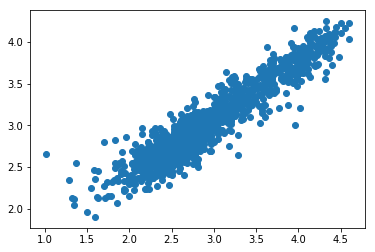

In [53]:
plt.scatter(test_inversed, predicted_inversed)
plt.show()

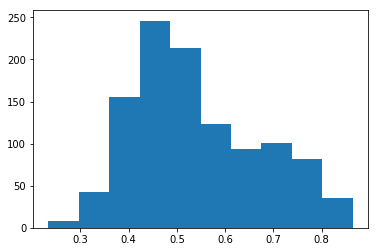

In [54]:
plt.hist(predicted)
plt.show()

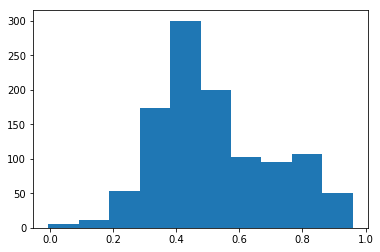

In [55]:
plt.hist(test_Y)
plt.show()

In [56]:
import cv2

ImportError: No module named cv2

In [57]:
from scipy import stats

Image Shape: (350, 350, 3)
Raw Score: 0.46529
Inversed Score: 2.76266
Percentile: 44.1818181818


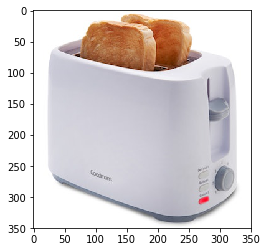

In [58]:
img_path = '/Users/dima/Downloads/toaster.jpg'
img=image.load_img(img_path)
img=image.img_to_array(img)
print 'Image Shape:', img.shape
plt.imshow(img/255.0)
p = new_model.predict(img.reshape((1,) + img.shape))
print 'Raw Score:', p[0][0]
inversed = scaler.inverse_transform(p.reshape(-1, 1))
print 'Inversed Score:', inversed[0][0]
print 'Percentile:', stats.percentileofscore(test_Y, p[0][0])
plt.show()

Image Shape: (350, 350, 3)
Raw Score: 0.737953
Inversed Score: 3.77606
Percentile: 83.2727272727


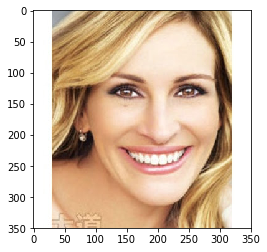

In [60]:
img_path = '/Users/dima/Pictures/jen.jpg'
img=image.load_img(img_path)
img=image.img_to_array(img)
print 'Image Shape:', img.shape
plt.imshow(img/255.0)
p = new_model.predict(img.reshape((1,) + img.shape))
print 'Raw Score:', p[0][0]
inversed = scaler.inverse_transform(p.reshape(-1, 1))
print 'Inversed Score:', inversed[0][0]
print 'Percentile:', stats.percentileofscore(test_Y, p[0][0])
plt.show()

In [257]:
ratings['ftw572.jpg']



3.6333333333333333

In [233]:
import Image

old_im = Image.open('someimage.jpg')
old_size = old_im.size

new_size = (800, 800)
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

new_im.show()

ImportError: No module named Image

In [80]:
from tensorflow.python.keras.layers import Input, Convolution2D, BatchNormalization, Activation
from tensorflow.python.keras import Model

In [91]:
g_input = Input(shape=(350, 350, 3))
H = Convolution2D(200, 3, padding='same')(g_input)
H = BatchNormalization()(H)
H = Activation('relu')(H)
H = Convolution2D(200, 3, padding='same')(H)
H = BatchNormalization()(H)
H = Activation('relu')(H)
H = Convolution2D(3, 1, 1, padding='same')(H)
g_V = Activation('sigmoid')(H)
generator = Model(g_input,g_V)
generator.compile(loss='binary_crossentropy', optimizer='adam')
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 350, 350, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 350, 350, 200)     5600      
_________________________________________________________________
batch_normalization_3 (Batch (None, 350, 350, 200)     800       
_________________________________________________________________
activation_53 (Activation)   (None, 350, 350, 200)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 350, 350, 200)     360200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 350, 350, 200)     800       
_________________________________________________________________
activation_54 (Activation)   (None, 350, 350, 200)     0         
__________

In [97]:
d_input = Input(shape=(350, 350, 3))
D = new_model(d_input)
#D = model(d_input)
#D = Dense(1)(D)
discriminator = Model(d_input, D)
discriminator.compile(loss='mean_squared_error', optimizer='adam')
discriminator.summary()
discriminator.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 350, 350, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 23589761  
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
gan_input = Input(shape=(350, 350, 3))
H = generator(gan_input)

gan_V = discriminator(H)
GAN = Model(gan_input, gan_V)
GAN.compile(loss='mean_squared_error', optimizer='adam')
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 350, 350, 3)       0         
_________________________________________________________________
model_7 (Model)              (None, 350, 350, 3)       368003    
_________________________________________________________________
model_11 (Model)             (None, 1)                 23589761  
Total params: 23,957,764
Trainable params: 367,203
Non-trainable params: 23,590,561
_________________________________________________________________


In [ ]:
GAN.fit(train_X, train_Y)

Epoch 1/1
